In [38]:
using UrlDownload, Plots, DataFrames, MLJ, Random

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat";
feature_names = ["age", "sex", "chest_pain", "rest_bp", "serum_cholestrol", "fasting_blood_sugar", "rest_ECG", "max_HR", "ex_ind_ang", "oldpeak",
"slope", "major_vessel", "thal","heart_dis"]
data = urldownload(url, true, format = :CSV, header = feature_names);
s_log = DataFrame(data)
describe(s_log)


,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,age,54.4333,29.0,55.0,77.0,0,Float64
2,sex,0.677778,0.0,1.0,1.0,0,Float64
3,chest_pain,3.17407,1.0,3.0,4.0,0,Float64
4,rest_bp,131.344,94.0,130.0,200.0,0,Float64
5,serum_cholestrol,249.659,126.0,245.0,564.0,0,Float64
6,fasting_blood_sugar,0.148148,0.0,0.0,1.0,0,Float64
7,rest_ECG,1.02222,0.0,2.0,2.0,0,Float64
8,max_HR,149.678,71.0,153.5,202.0,0,Float64
9,ex_ind_ang,0.32963,0.0,0.0,1.0,0,Float64


In [39]:
autotype(s_log)

Dict{Symbol, Type} with 9 entries:
  :rest_ECG            => OrderedFactor
  :chest_pain          => OrderedFactor
  :fasting_blood_sugar => OrderedFactor
  :major_vessel        => OrderedFactor
  :sex                 => OrderedFactor
  :ex_ind_ang          => OrderedFactor
  :thal                => OrderedFactor
  :slope               => OrderedFactor
  :heart_dis           => OrderedFactor

In [40]:
coerce!(s_log, autotype(s_log));
schema(s_log)

┌─────────────────────┬───────────────────────────────────┬──────────────────┐
│ _.names             │ _.types                           │ _.scitypes       │
├─────────────────────┼───────────────────────────────────┼──────────────────┤
│ age                 │ Float64                           │ Continuous       │
│ sex                 │ CategoricalValue{Float64, UInt32} │ OrderedFactor{2} │
│ chest_pain          │ CategoricalValue{Float64, UInt32} │ OrderedFactor{4} │
│ rest_bp             │ Float64                           │ Continuous       │
│ serum_cholestrol    │ Float64                           │ Continuous       │
│ fasting_blood_sugar │ CategoricalValue{Float64, UInt32} │ OrderedFactor{2} │
│ rest_ECG            │ CategoricalValue{Float64, UInt32} │ OrderedFactor{3} │
│ max_HR              │ Float64                           │ Continuous       │
│ ex_ind_ang          │ CategoricalValue{Float64, UInt32} │ OrderedFactor{2} │
│ oldpeak             │ Float64                     

In [41]:
coerce!(s_log,
          :presence => OrderedFactor,
          :exang    => OrderedFactor,
          :sex      => OrderedFactor,
          :fbs      => OrderedFactor,
          :restecg  => Multiclass,
          :slope    => OrderedFactor,
          :ca       => Continuous,
          :thal     => Multiclass,
          :cp       => Multiclass);
schema(s_log)

┌─────────────────────┬───────────────────────────────────┬──────────────────┐
│ _.names             │ _.types                           │ _.scitypes       │
├─────────────────────┼───────────────────────────────────┼──────────────────┤
│ age                 │ Float64                           │ Continuous       │
│ sex                 │ CategoricalValue{Float64, UInt32} │ OrderedFactor{2} │
│ chest_pain          │ CategoricalValue{Float64, UInt32} │ OrderedFactor{4} │
│ rest_bp             │ Float64                           │ Continuous       │
│ serum_cholestrol    │ Float64                           │ Continuous       │
│ fasting_blood_sugar │ CategoricalValue{Float64, UInt32} │ OrderedFactor{2} │
│ rest_ECG            │ CategoricalValue{Float64, UInt32} │ OrderedFactor{3} │
│ max_HR              │ Float64                           │ Continuous       │
│ ex_ind_ang          │ CategoricalValue{Float64, UInt32} │ OrderedFactor{2} │
│ oldpeak             │ Float64                     

In [42]:
y, X = unpack(s_log, ==(:heart_dis), name->true; rng=123);
scitype(y)

AbstractVector{OrderedFactor{2}} (alias for AbstractArray{OrderedFactor{2}, 1})

In [43]:
describe(X)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,age,54.4333,29.0,55.0,77.0,0,Float64
2,sex,,0.0,,1.0,0,"CategoricalValue{Float64, UInt32}"
3,chest_pain,,1.0,,4.0,0,"CategoricalValue{Float64, UInt32}"
4,rest_bp,131.344,94.0,130.0,200.0,0,Float64
5,serum_cholestrol,249.659,126.0,245.0,564.0,0,Float64
6,fasting_blood_sugar,,0.0,,1.0,0,"CategoricalValue{Float64, UInt32}"
7,rest_ECG,,0.0,,2.0,0,"CategoricalValue{Float64, UInt32}"
8,max_HR,149.678,71.0,153.5,202.0,0,Float64
9,ex_ind_ang,,0.0,,1.0,0,"CategoricalValue{Float64, UInt32}"


In [44]:
schema(X)

┌─────────────────────┬───────────────────────────────────┬──────────────────┐
│ _.names             │ _.types                           │ _.scitypes       │
├─────────────────────┼───────────────────────────────────┼──────────────────┤
│ age                 │ Float64                           │ Continuous       │
│ sex                 │ CategoricalValue{Float64, UInt32} │ OrderedFactor{2} │
│ chest_pain          │ CategoricalValue{Float64, UInt32} │ OrderedFactor{4} │
│ rest_bp             │ Float64                           │ Continuous       │
│ serum_cholestrol    │ Float64                           │ Continuous       │
│ fasting_blood_sugar │ CategoricalValue{Float64, UInt32} │ OrderedFactor{2} │
│ rest_ECG            │ CategoricalValue{Float64, UInt32} │ OrderedFactor{3} │
│ max_HR              │ Float64                           │ Continuous       │
│ ex_ind_ang          │ CategoricalValue{Float64, UInt32} │ OrderedFactor{2} │
│ oldpeak             │ Float64                     

In [45]:
using MLJ, Random, Plots

tree = (@load DecisionTreeClassifier pkg=DecisionTree verbosity=0)()
forest = EnsembleModel(atom=tree, n=250);
forest.atom.n_subfeatures = 5


5

In [46]:
params(forest) 

(atom = (max_depth = -1,
         min_samples_leaf = 1,
         min_samples_split = 2,
         min_purity_increase = 0.0,
         n_subfeatures = 5,
         post_prune = false,
         merge_purity_threshold = 1.0,
         pdf_smoothing = 0.0,
         display_depth = 5,
         rng = Random._GLOBAL_RNG(),),
 atomic_weights = Float64[],
 bagging_fraction = 0.8,
 rng = Random._GLOBAL_RNG(),
 n = 250,
 acceleration = CPU1{Nothing}(nothing),
 out_of_bag_measure = Any[],)

In [47]:
mach = machine(forest, X, y)
fit!(mach, verbosity=0);

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeClassifier} @289`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{Multiclass{3}}, AbstractVector{OrderedFactor{3}}, AbstractVector{OrderedFactor{2}}, AbstractVector{OrderedFactor{4}}}}
│ input_scitype(model) = Table{var"#s46"} where var"#s46"<:Union{AbstractVector{var"#s9"} where var"#s9"<:Count, AbstractVector{var"#s9"} where var"#s9"<:OrderedFactor, AbstractVector{var"#s9"} where var"#s9"<:Continuous}.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:91


In [49]:
mach = machine(forest, X, y)
perf = evaluate!(mach, resampling=CV())
perf.per_fold

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeClassifier} @289`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{Multiclass{3}}, AbstractVector{OrderedFactor{3}}, AbstractVector{OrderedFactor{2}}, AbstractVector{OrderedFactor{4}}}}
│ input_scitype(model) = Table{var"#s46"} where var"#s46"<:Union{AbstractVector{var"#s9"} where var"#s9"<:Count, AbstractVector{var"#s9"} where var"#s9"<:OrderedFactor, AbstractVector{var"#s9"} where var"#s9"<:Continuous}.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:91
Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


1-element Vector{Vector{Float64}}:
 [0.4946888035034974, 0.4331606082102317, 0.426463898591711, 0.37360883868634015, 0.4475385494629994, 0.3793331409778367]

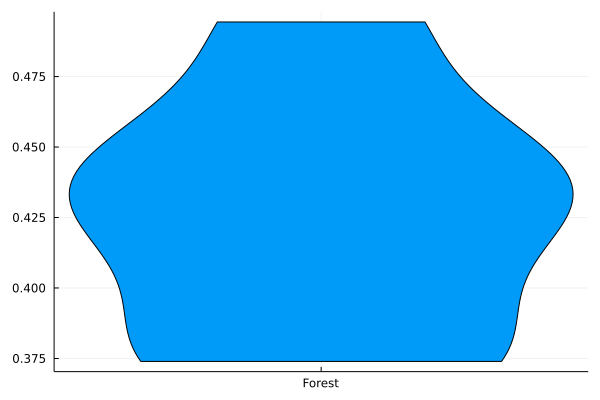

In [50]:
using StatsPlots
violin(["Forest"], perf.per_fold[1], label=nothing)

In [51]:
########### Now trying model tuning  #####################

In [52]:
r = range(forest, :n, lower=10, upper=1000)
curves = learning_curve!(mach, resampling=CV(nfolds=10),
                         range=r, measure=auc);

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…},…} @922.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:342
┌ Info: Attempting to evaluate 30 models.
└ @ MLJTuning C:\Users\kapil\.julia\packages\MLJTuning\Uj5Cx\src\tuned_models.jl:602
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{CV,…} @128`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{Multiclass{3}}, AbstractVector{OrderedFactor{3}}, AbstractVector{OrderedFactor{2}}, AbstractVector{OrderedFactor{4}}}}
│ input_scitype(model) = Table{var"#s46"} where var"#s46"<:Union{AbstractVector{var"#s9"} where var"#s9"<:Count, AbstractVector{var"#s9"} where var"#s9"<:OrderedFactor, AbstractVector{var"#s9"} where var"#s9"<:Continuous}.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:91
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeClassi

Evaluating over 30 metamodels:  37%[=========>               ]  ETA: 0:00:42┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeClassifier} @597`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{Multiclass{3}}, AbstractVector{OrderedFactor{3}}, AbstractVector{OrderedFactor{2}}, AbstractVector{OrderedFactor{4}}}}
│ input_scitype(model) = Table{var"#s46"} where var"#s46"<:Union{AbstractVector{var"#s9"} where var"#s9"<:Count, AbstractVector{var"#s9"} where var"#s9"<:OrderedFactor, AbstractVector{var"#s9"} where var"#s9"<:Continuous}.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:91
Evaluating over 30 metamodels:  40%[==========>              ]  ETA: 0:00:46┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeClassifier} @063`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{

Evaluating over 30 metamodels:  77%[===================>     ]  ETA: 0:00:51┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeClassifier} @375`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{Multiclass{3}}, AbstractVector{OrderedFactor{3}}, AbstractVector{OrderedFactor{2}}, AbstractVector{OrderedFactor{4}}}}
│ input_scitype(model) = Table{var"#s46"} where var"#s46"<:Union{AbstractVector{var"#s9"} where var"#s9"<:Count, AbstractVector{var"#s9"} where var"#s9"<:OrderedFactor, AbstractVector{var"#s9"} where var"#s9"<:Continuous}.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:91
Evaluating over 30 metamodels:  80%[====================>    ]  ETA: 0:00:47┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeClassifier} @272`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{

In [53]:
Random.seed!(11)
r = range(forest, :n, lower=10, upper=1000)
curves = learning_curve!(mach, resampling=Holdout(fraction_train=0.8),
                         range=r, measure=auc);

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…},…} @286.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:342
┌ Info: Attempting to evaluate 30 models.
└ @ MLJTuning C:\Users\kapil\.julia\packages\MLJTuning\Uj5Cx\src\tuned_models.jl:602
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{Holdout,…} @593`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{Multiclass{3}}, AbstractVector{OrderedFactor{3}}, AbstractVector{OrderedFactor{2}}, AbstractVector{OrderedFactor{4}}}}
│ input_scitype(model) = Table{var"#s46"} where var"#s46"<:Union{AbstractVector{var"#s9"} where var"#s9"<:Count, AbstractVector{var"#s9"} where var"#s9"<:OrderedFactor, AbstractVector{var"#s9"} where var"#s9"<:Continuous}.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:91
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeC

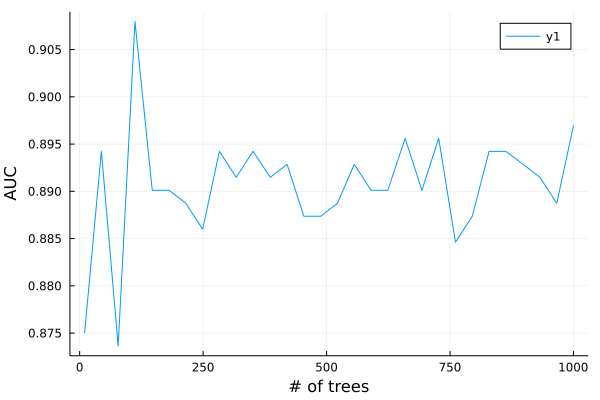

In [54]:
plot(curves.parameter_values, curves.measurements, ylabel="AUC", xlabel="# of trees")

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…},…} @654.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:342
┌ Info: Attempting to evaluate 30 models.
└ @ MLJTuning C:\Users\kapil\.julia\packages\MLJTuning\Uj5Cx\src\tuned_models.jl:602
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{Holdout,…} @985`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{Multiclass{3}}, AbstractVector{OrderedFactor{3}}, AbstractVector{OrderedFactor{2}}, AbstractVector{OrderedFactor{4}}}}
│ input_scitype(model) = Table{var"#s46"} where var"#s46"<:Union{AbstractVector{var"#s9"} where var"#s9"<:Count, AbstractVector{var"#s9"} where var"#s9"<:OrderedFactor, AbstractVector{var"#s9"} where var"#s9"<:Continuous}.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:91
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeC

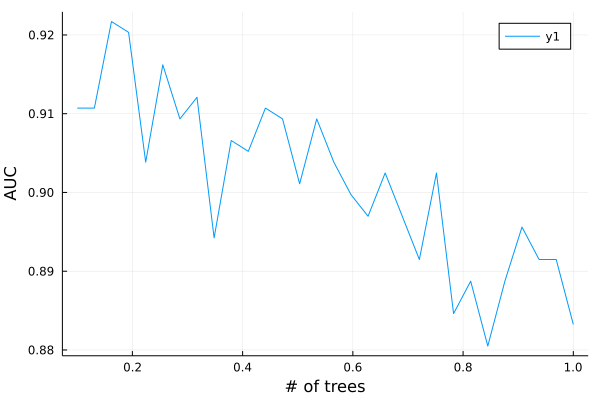

In [55]:
r = range(forest, :bagging_fraction, lower=0.1, upper=1.0)
curves = learning_curve!(mach, resampling=Holdout(fraction_train=0.8),
                         range=r, measure=auc);
plot(curves.parameter_values, curves.measurements, ylabel="AUC", xlabel="# of trees")

In [56]:
################################### Auto tuning ##########################################################3

In [57]:
r1 = range(forest, :(atom.n_subfeatures), lower=1, upper=6)
r2 = range(forest, :bagging_fraction, lower=0.4, upper=1.0)
tm = TunedModel(model=forest, tuning=Grid(resolution=10),
                resampling=CV(nfolds=6), ranges=[r1, r2],
                measure=auc)
m = machine(tm, X, y)
MLJ.fit!(m);

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticTunedModel{Grid,…} @548`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{Multiclass{3}}, AbstractVector{OrderedFactor{3}}, AbstractVector{OrderedFactor{2}}, AbstractVector{OrderedFactor{4}}}}
│ input_scitype(model) = Table{var"#s46"} where var"#s46"<:Union{AbstractVector{var"#s9"} where var"#s9"<:Count, AbstractVector{var"#s9"} where var"#s9"<:OrderedFactor, AbstractVector{var"#s9"} where var"#s9"<:Continuous}.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:91
┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…},…} @947.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:342
┌ Info: Attempting to evaluate 60 models.
└ @ MLJTuning C:\Users\kapil\.julia\packages\MLJTuning\Uj5Cx\src\tuned_models.jl:602
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{CV,…} @920`:
│ scit

Evaluating over 60 metamodels:  17%[====>                    ]  ETA: 0:00:30┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeClassifier} @844`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{Multiclass{3}}, AbstractVector{OrderedFactor{3}}, AbstractVector{OrderedFactor{2}}, AbstractVector{OrderedFactor{4}}}}
│ input_scitype(model) = Table{var"#s46"} where var"#s46"<:Union{AbstractVector{var"#s9"} where var"#s9"<:Count, AbstractVector{var"#s9"} where var"#s9"<:OrderedFactor, AbstractVector{var"#s9"} where var"#s9"<:Continuous}.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:91
Evaluating over 60 metamodels:  18%[====>                    ]  ETA: 0:00:29┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeClassifier} @331`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{

Evaluating over 60 metamodels:  37%[=========>               ]  ETA: 0:00:24┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeClassifier} @201`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{Multiclass{3}}, AbstractVector{OrderedFactor{3}}, AbstractVector{OrderedFactor{2}}, AbstractVector{OrderedFactor{4}}}}
│ input_scitype(model) = Table{var"#s46"} where var"#s46"<:Union{AbstractVector{var"#s9"} where var"#s9"<:Count, AbstractVector{var"#s9"} where var"#s9"<:OrderedFactor, AbstractVector{var"#s9"} where var"#s9"<:Continuous}.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:91
Evaluating over 60 metamodels:  38%[=========>               ]  ETA: 0:00:23┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeClassifier} @905`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{

Evaluating over 60 metamodels:  57%[==============>          ]  ETA: 0:00:16┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeClassifier} @908`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{Multiclass{3}}, AbstractVector{OrderedFactor{3}}, AbstractVector{OrderedFactor{2}}, AbstractVector{OrderedFactor{4}}}}
│ input_scitype(model) = Table{var"#s46"} where var"#s46"<:Union{AbstractVector{var"#s9"} where var"#s9"<:Count, AbstractVector{var"#s9"} where var"#s9"<:OrderedFactor, AbstractVector{var"#s9"} where var"#s9"<:Continuous}.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:91
Evaluating over 60 metamodels:  58%[==============>          ]  ETA: 0:00:16┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeClassifier} @288`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{

Evaluating over 60 metamodels:  77%[===================>     ]  ETA: 0:00:09┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeClassifier} @160`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{Multiclass{3}}, AbstractVector{OrderedFactor{3}}, AbstractVector{OrderedFactor{2}}, AbstractVector{OrderedFactor{4}}}}
│ input_scitype(model) = Table{var"#s46"} where var"#s46"<:Union{AbstractVector{var"#s9"} where var"#s9"<:Count, AbstractVector{var"#s9"} where var"#s9"<:OrderedFactor, AbstractVector{var"#s9"} where var"#s9"<:Continuous}.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:91
Evaluating over 60 metamodels:  78%[===================>     ]  ETA: 0:00:08┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeClassifier} @038`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{

Evaluating over 60 metamodels:  97%[========================>]  ETA: 0:00:01┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeClassifier} @004`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{Multiclass{3}}, AbstractVector{OrderedFactor{3}}, AbstractVector{OrderedFactor{2}}, AbstractVector{OrderedFactor{4}}}}
│ input_scitype(model) = Table{var"#s46"} where var"#s46"<:Union{AbstractVector{var"#s9"} where var"#s9"<:Count, AbstractVector{var"#s9"} where var"#s9"<:OrderedFactor, AbstractVector{var"#s9"} where var"#s9"<:Continuous}.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:91
Evaluating over 60 metamodels:  98%[========================>]  ETA: 0:00:01┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeClassifier} @092`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{

In [58]:
r = report(m)
r.best_history_entry.measurement[1]

0.9061842429542658

In [59]:
#Pkg.build("PyCall")

In [60]:
#import Pkg; Pkg.add("PyPlot")
using PyPlot

In [61]:
res = r.plotting
vals_sf = res.parameter_values[:, 1]
vals_bf = res.parameter_values[:, 2];

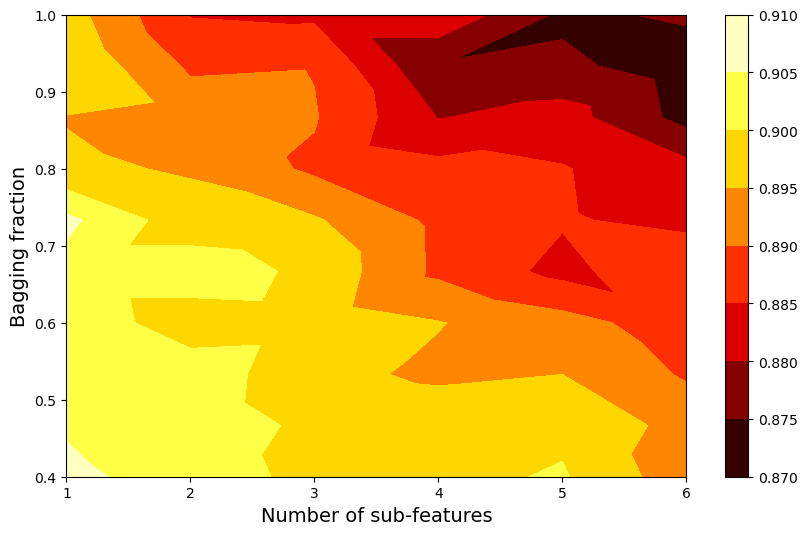

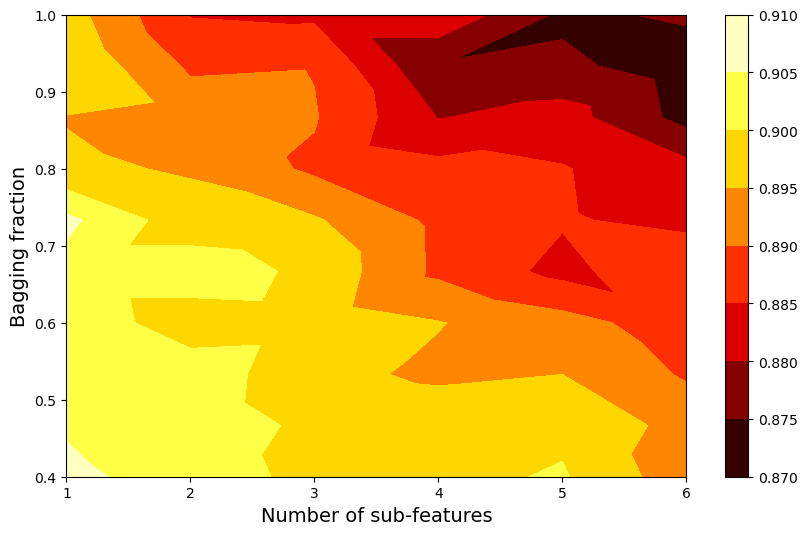

In [62]:
f=figure(figsize=(10,6))
tricontourf(vals_sf, vals_bf, res.measurements, cmap=get_cmap("hot"))
xlabel("Number of sub-features", fontsize=14)
ylabel("Bagging fraction", fontsize=14)
colorbar();
display(f)

In [63]:
idx = argmin(res.measurements)
vals_sf[idx],vals_bf[idx]

(6, 0.9333333333333333)

In [64]:
### here we got the best combination of best features : 6 sub features and 1.0 for bagging fraction) ##############

In [65]:
using BenchmarkTools
@btime learning_curve!(mach, resampling=Holdout(fraction_train=0.8),
                         range=range(forest, :bagging_fraction, lower=0.1, upper=1.0), measure=auc);

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…},…} @920.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:342
┌ Info: Attempting to evaluate 30 models.
└ @ MLJTuning C:\Users\kapil\.julia\packages\MLJTuning\Uj5Cx\src\tuned_models.jl:602
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=Resampler{Holdout,…} @294`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{Multiclass{3}}, AbstractVector{OrderedFactor{3}}, AbstractVector{OrderedFactor{2}}, AbstractVector{OrderedFactor{4}}}}
│ input_scitype(model) = Table{var"#s46"} where var"#s46"<:Union{AbstractVector{var"#s9"} where var"#s9"<:Count, AbstractVector{var"#s9"} where var"#s9"<:OrderedFactor, AbstractVector{var"#s9"} where var"#s9"<:Continuous}.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:91
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeC

Evaluating over 30 metamodels: 100%[=========================] Time: 0:00:03
┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeClassifier} @938`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{Multiclass{3}}, AbstractVector{OrderedFactor{3}}, AbstractVector{OrderedFactor{2}}, AbstractVector{OrderedFactor{4}}}}
│ input_scitype(model) = Table{var"#s46"} where var"#s46"<:Union{AbstractVector{var"#s9"} where var"#s9"<:Count, AbstractVector{var"#s9"} where var"#s9"<:OrderedFactor, AbstractVector{var"#s9"} where var"#s9"<:Continuous}.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:91
┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…},…} @408.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:342
┌ Info: Attempting to evaluate 30 models.
└ @ MLJTuning C:\Users\kapil\.julia\packages\MLJTuning\Uj5Cx\src\tuned_models.jl:602
┌ Warning: The scity

  2.970 s (29413358 allocations: 2.03 GiB)



┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=ProbabilisticEnsembleModel{DecisionTreeClassifier} @919`:
│ scitype(X) = Table{Union{AbstractVector{Continuous}, AbstractVector{Multiclass{3}}, AbstractVector{OrderedFactor{3}}, AbstractVector{OrderedFactor{2}}, AbstractVector{OrderedFactor{4}}}}
│ input_scitype(model) = Table{var"#s46"} where var"#s46"<:Union{AbstractVector{var"#s9"} where var"#s9"<:Count, AbstractVector{var"#s9"} where var"#s9"<:OrderedFactor, AbstractVector{var"#s9"} where var"#s9"<:Continuous}.
└ @ MLJBase C:\Users\kapil\.julia\packages\MLJBase\KWyqX\src\machines.jl:91
